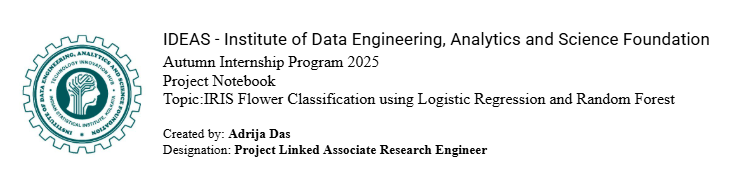

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.It is one of the most famous datasets in machine learning. It contains measurements of 150 iris flowers from three different species:

1.Iris Setosa

2.Iris Versicolor

3.Iris Virginica


For each flower, we have 4 numerical features:

1.Sepal length (cm)

2.Sepal width (cm)

3.Petal length (cm)

4.Petal width (cm)

The goal is to build a classification model that can predict the species of an iris flower based on its features.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading and Visualization

In [ ]:
# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)

# Combine for quick view
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Dataset info
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


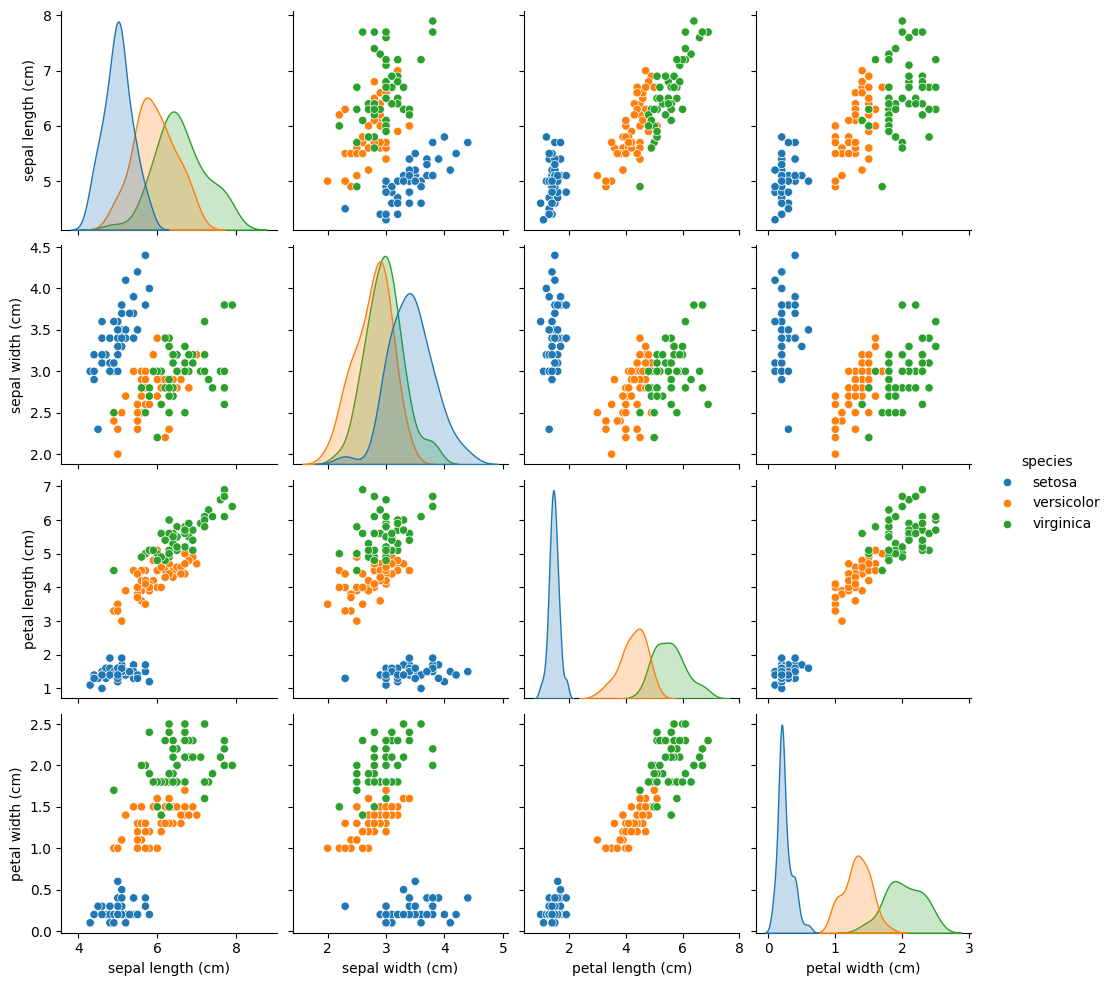

In [ ]:
# Pairplot visualization
sns.pairplot(df, hue="species")
plt.show()

**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?

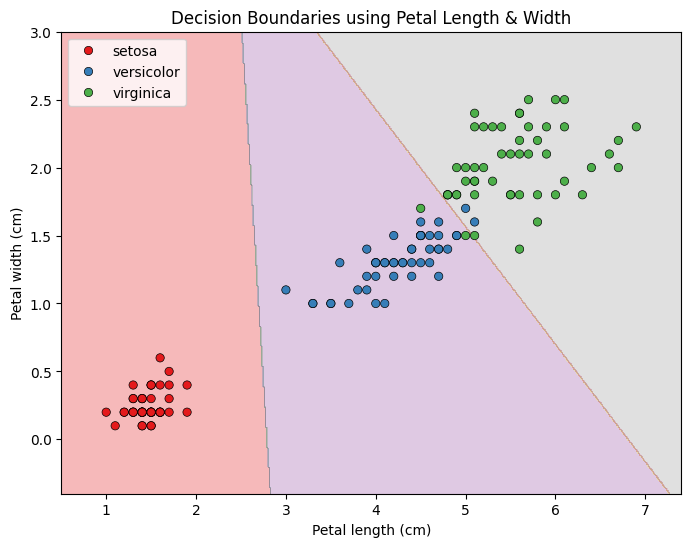

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data[:, 2:4]   # Only petal length and petal width
y = iris.target
target_names = iris.target_names

model = LogisticRegression(max_iter=200)
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=[target_names[i] for i in y],
                palette="Set1", edgecolor="k")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Boundaries using Petal Length & Width")
plt.show()


The setosa completely separated from other species along both petal length and petal width.
Verginca and Versicolor have overlapped in sepal feature but with petal length and petal width, they formed two clusters with only a small overlap.

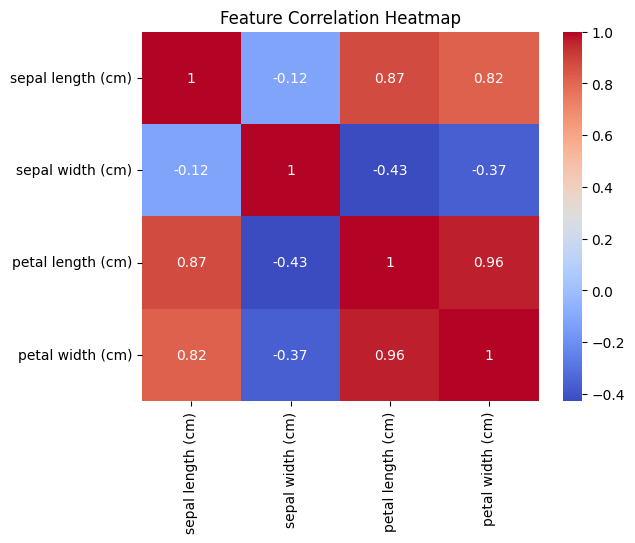

In [ ]:
#Heat Map Visualisation
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# Train/Test Split

**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

Most correlated pair is petal length and petal width, correlation is approximately 0.96 cm.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 105
Test samples: 45


 **Question 3**.

  Why do we split the dataset into training and testing sets?

We split the dataset intoo training and testing sets because we can generalise these from that large dataset. Through training dataset we can learn about model patterns and from testing set we can check if those data can generalize new data or not.    

# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



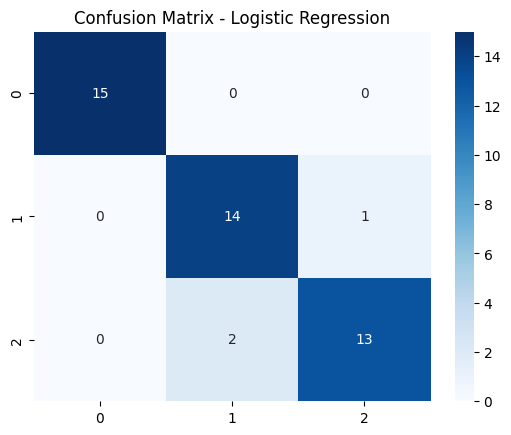

In [ ]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?

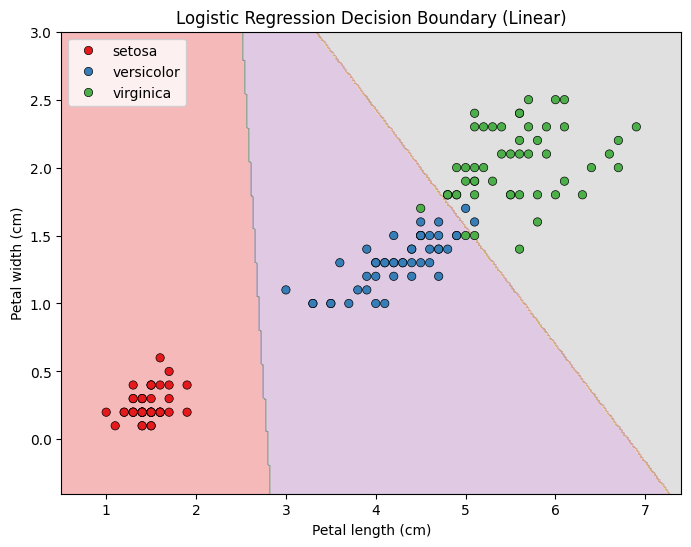

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]   # Only petal length and petal width
y = iris.target
target_names = iris.target_names

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# Scatter plot of actual points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=[target_names[i] for i in y],
                palette="Set1", edgecolor="k")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Logistic Regression Decision Boundary (Linear)")
plt.show()


Logistic Regression assumes a linear decision boundary because it relies on a linear weighted combination of features before applying the logistic functions.

**Question 5.**

Do you think this assumption holds for the Iris dataset? Why or why not?

In the case of Iris Setosa vs Others, a straight line can perfectly separate Setosa from the other two classes, so the assumption works here well.

In the case of Iris Versicolor vs Virginica, these two species overlap significantly in petal length and petal width, so the assumption here slightly fails.

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.



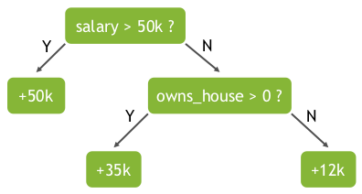
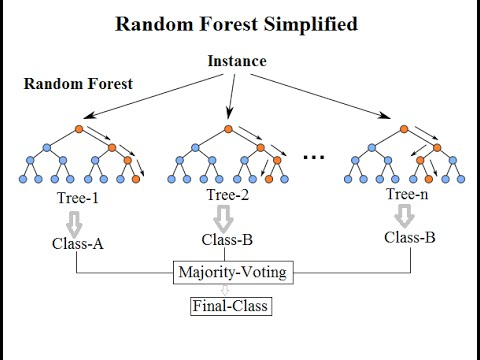

Accuracy (Random Forest): 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



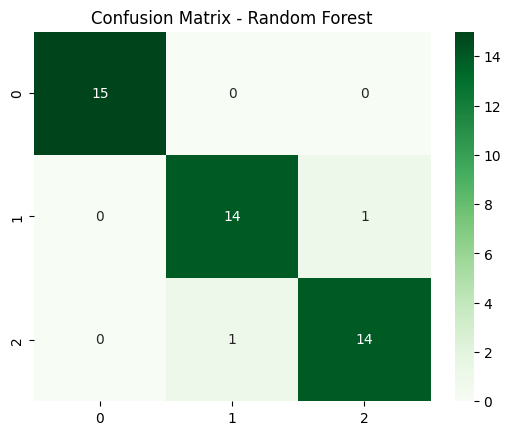

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Question 6**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

The accuracy stays still if we increase the number of trees.

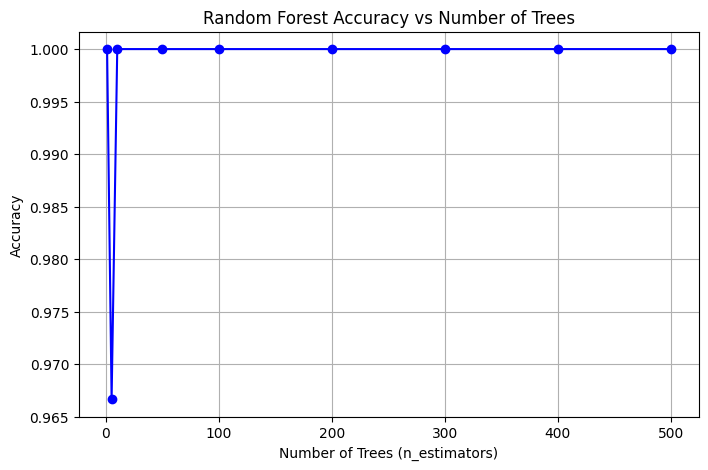

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_trees = [1, 5, 10, 50, 100, 200, 300, 400, 500]
accuracies = []

# Train Random Forest with different number of trees
for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(n_trees, accuracies, marker='o', linestyle='-', color='b')
plt.title("Random Forest Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

Random Forest usually has slightly higher accuracy as it has the ability to handle non linear boundaries and feature interactions.

**Question 8**.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

For a large dataset with noisy features, random forest is expected to generalize better because of its ensemble approach, robustness to noise, and ability to model complex patterns without requiring huge features of engineering.

**Question 9.**

Run the Entire Notebook with this dataset separately http://archive.ics.uci.edu/dataset/174/parkinsons. Also Answer the above questions for this dataset too.

In [ ]:
!pip3 install -U ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# Load the Parkinson's dataset
parkinsons = fetch_ucirepo(id=174)

# Extract features and target
X = parkinsons.data.features   # Feature set
y = parkinsons.data.targets    # Target variable

# View metadata and variable information
print(parkinsons.metadata)
print(parkinsons.variables)
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(X.head())
print(y.head())



{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'ID': 385, 'type': 'NATIVE', 'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'venue': 'BioMedical Engineering OnLine', 'year': 2007, 'journal': None, 'DOI': '10.1186/1475-925X-6-23', 'URL

Original columns (in order):
['MDVP:Fo', 'MDVP:Fhi', 'MDVP:Flo', 'MDVP:Jitter', 'MDVP:Jitter', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']

Any duplicated column names?: True
Duplicate positions (True means duplicate occurrence):
 [False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]

Renamed columns (duplicates made unique):
['MDVP:Fo', 'MDVP:Fhi', 'MDVP:Flo', 'MDVP:Jitter', 'MDVP:Jitter_1', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer_1', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']

Using target column: status

Selected feature columns for pairplot: ['MDVP:Fo', 'MDVP:Fhi', 'MDVP:Flo', 'MDVP:Jitter', 'MDVP:Shimmer'

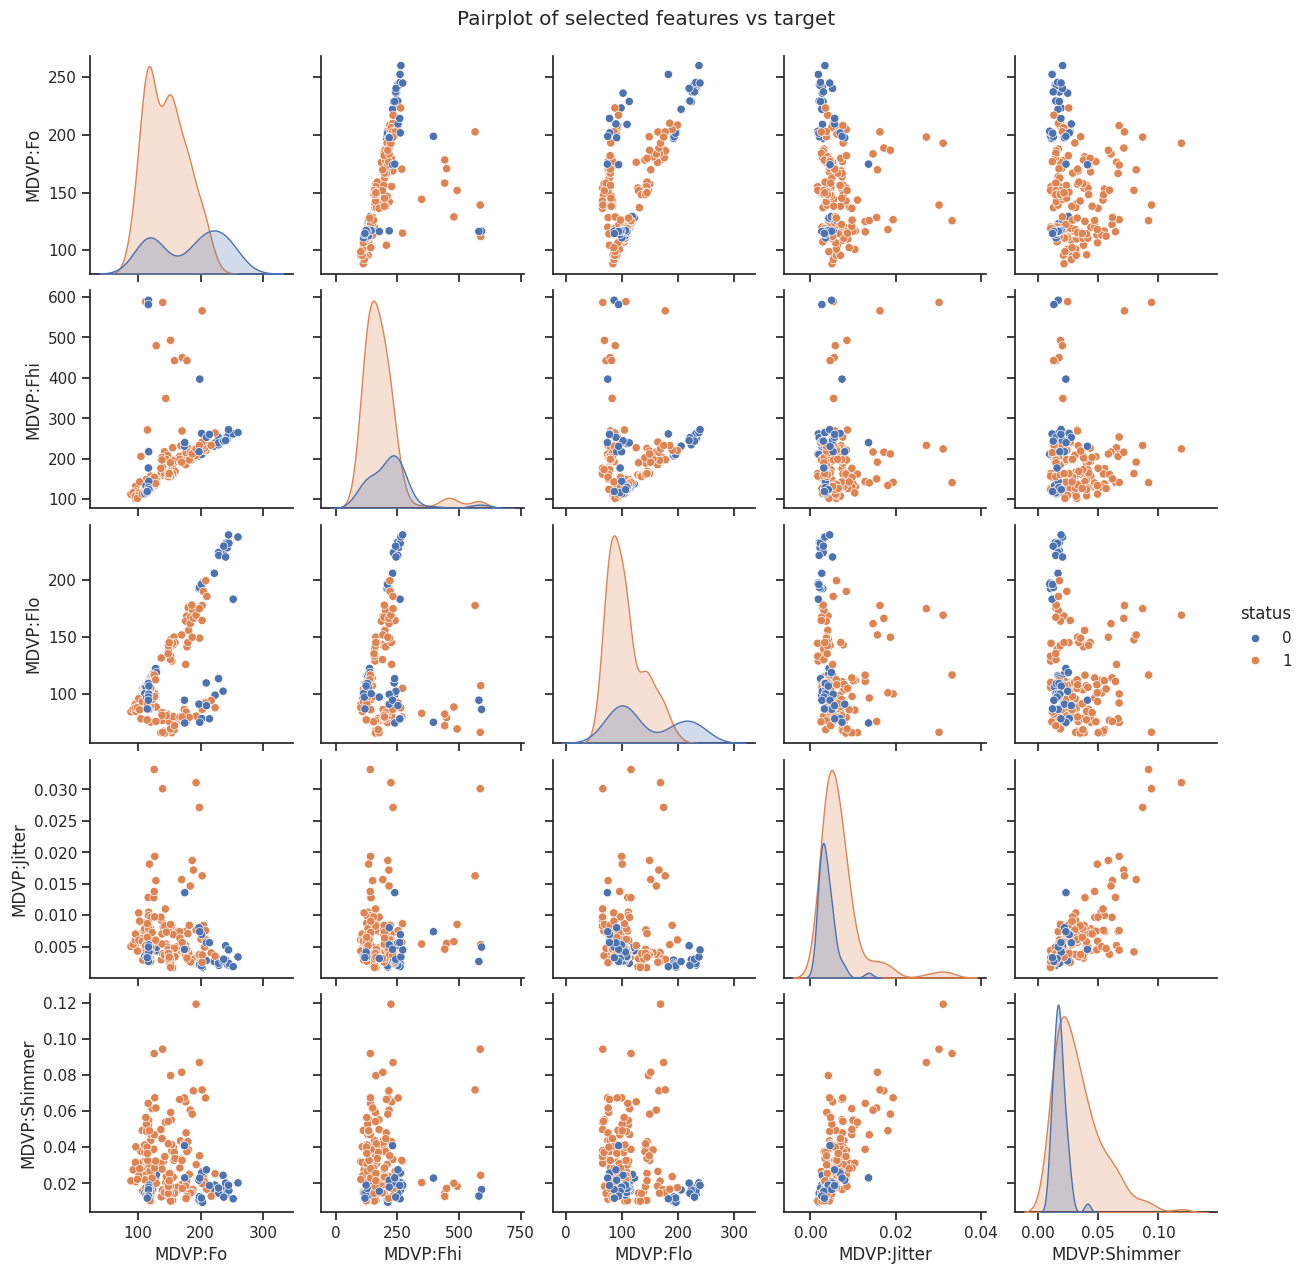

In [ ]:
# Robust pairplot generator for the Parkinson's dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X and y
df = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# 1) Diagnostics
print("Original columns (in order):")
print(df.columns.tolist())
print("\nAny duplicated column names?:", any(df.columns.duplicated()))
if any(df.columns.duplicated()):
    dup_info = pd.Series(df.columns).duplicated(keep='first')
    print("Duplicate positions (True means duplicate occurrence):\n", dup_info.tolist())

# 2) Make column names unique (keep first, append _1, _2 to duplicates)
new_cols = []
counts = {}
for c in df.columns:
    if c in counts:
        counts[c] += 1
        new_cols.append(f"{c}_{counts[c]}")
    else:
        counts[c] = 0
        new_cols.append(c)
df.columns = new_cols

print("\nRenamed columns (duplicates made unique):")
print(df.columns.tolist())

# 3) Detect target column name (original y column name)
orig_target_name = y.columns[0] if hasattr(y, 'columns') else 'status'
target_col = None
if orig_target_name in df.columns:
    target_col = orig_target_name
else:
    for c in df.columns:
        if c == orig_target_name or c.startswith(orig_target_name + "_") or c.startswith(orig_target_name + "."):
            target_col = c
            break

if target_col is None:
    target_col = df.columns[-1]
    print(f"\nWarning: couldn't find original target name '{orig_target_name}'. Falling back to last column: '{target_col}'.")

print("\nUsing target column:", target_col)

# 4) Desired base feature names (from your list)
bases = ['MDVP:Fo', 'MDVP:Fhi', 'MDVP:Flo', 'MDVP:Jitter', 'MDVP:Shimmer']

# helper to find the actual column in df for each base name (first match)
def find_first_col(df_cols, base):
    if base in df_cols:
        return base
    for c in df_cols:
        if c.startswith(base + "_") or c.startswith(base + "."):
            return c
    return None

selected = []
for b in bases:
    col = find_first_col(df.columns, b)
    if col:
        selected.append(col)

# If we found fewer than 2 selected features, fall back to top numeric features by correlation
if len(selected) < 2:
    print("\nCould not find enough of the requested feature names. Selecting top numeric features by correlation with target.")
    # convert all columns to numeric (coerce)
    df_numeric = df.copy().apply(pd.to_numeric, errors='coerce')
    numeric_cols = df_numeric.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)
    corr = df_numeric[numeric_cols + [target_col]].corr()[target_col].abs().sort_values(ascending=False)
    top_k = min(5, len(corr))
    selected = corr.index[:top_k].tolist()
    print("Selected by correlation:", selected)
else:
    print("\nSelected feature columns for pairplot:", selected)

# 5) Prepare plot dataframe: ensure numeric, drop NA rows in selected + target
plot_cols = selected + [target_col]
df_plot = df[plot_cols].copy().apply(pd.to_numeric, errors='coerce').dropna()
print("\nData prepared for plotting. Shape after dropna:", df_plot.shape)

# 6) Limit rows to keep plotting responsive
max_rows = 2000
if df_plot.shape[0] > max_rows:
    df_plot = df_plot.sample(max_rows, random_state=42)
    print(f"Sampled down to {max_rows} rows for plotting.")

# 7) Ensure target is categorical for hue
df_plot[target_col] = df_plot[target_col].astype('category')

# 8) Plot pairplot
sns.set(style="ticks")
try:
    g = sns.pairplot(df_plot, hue=target_col, diag_kind='kde', corner=False)
    plt.suptitle("Pairplot of selected features vs target", y=1.02)
    plt.show()
except Exception as e:
    print("\nAn error occurred while drawing the pairplot:")



**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?

MDVP:Fo(fundamental frequency) and MDVP:Fhi(maximum frequency), these two features provide the clearest visual separation between healthy individuals and Parkinson's patients.

Top 10 correlations with Parkinson's status:

spread1         0.564838
PPE             0.531039
spread2         0.454842
MDVP:Shimmer    0.367430
MDVP:Shimmer    0.367430
MDVP:APQ        0.364316
Shimmer:APQ5    0.351148
Shimmer:APQ3    0.347617
Shimmer:DDA     0.347608
D2              0.340232
Name: status, dtype: float64


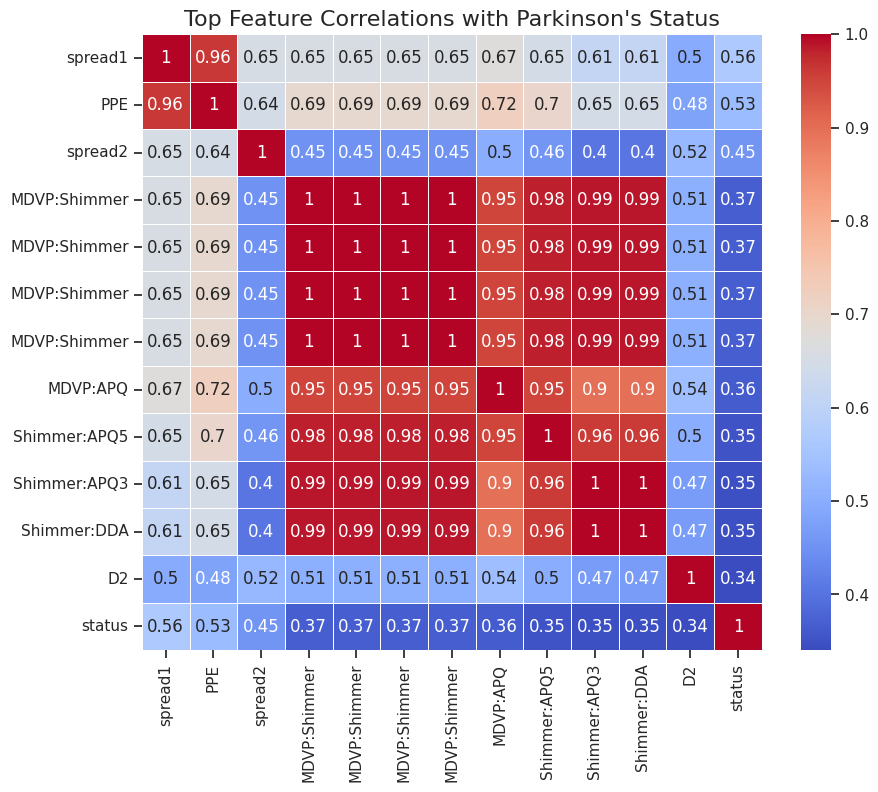

In [ ]:
#heatmap visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine features and target into one DataFrame
df = pd.concat([X, y], axis=1)

# Compute correlation matrix
corr = df.corr()

# Get top 10 correlations with status (excluding status itself)
top_corr = corr['status'].drop('status').sort_values(ascending=False).head(10)

print("Top 10 correlations with Parkinson's status:\n")
print(top_corr)

# Plot heatmap for these features + status
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr.index.tolist() + ['status']].corr(),
            annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Top Feature Correlations with Parkinson's Status", fontsize=16)
plt.show()


**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

The strongest correlation is between Shimmer:APQ3 and Shimmer:DDA (approx      0.99). This implies redundancy - both features capture nearly the same information about voice amplitude variations.

 **Question 3**.

  Why do we split the dataset into training and testing sets?

Training set: Used by the model to learn relationships between vocal features  (jitter, shimmer) and status (healthy vs Parkinson's).

Test set: Used later to evaluate accuracy — checking if the model can correctly classify new patients it has not seen before.

# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

 Accuracy: 0.9230769230769231

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



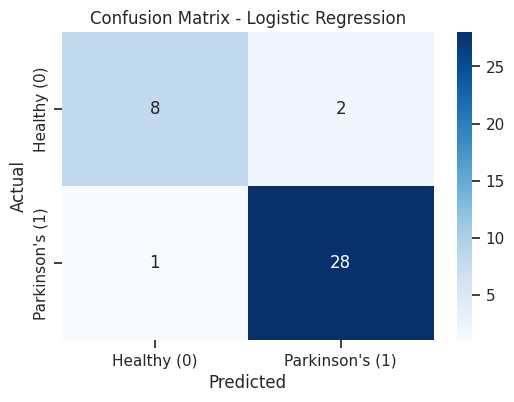

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one DataFrame
df = pd.concat([X, y], axis=1)

# Define features and target
X_data = df.drop('status', axis=1)
y_data = df['status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy (0)', 'Parkinson\'s (1)'], yticklabels=['Healthy (0)', 'Parkinson\'s (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?

Logistic Regression assumes a linear decision boundary because it models the log-odds of the outcome as a linear function of the input features.

**Question 5.**

Do you think this assumption holds for the Parkinson's dataset? Why or why not?

The linear assumption does not strictly hold for the Parkinson's dataset because the voice features (jitter, shimmer, spread1) interact in complex, nonlinear ways that logistic regression cannot model directly.

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.



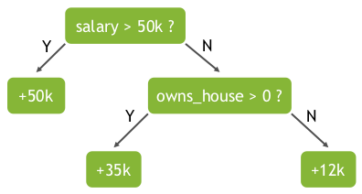
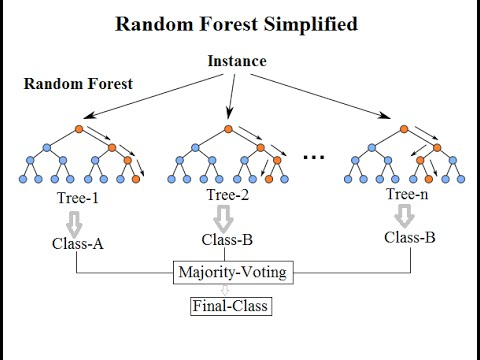

In [ ]:
!pip3 install -U ucimlrepo


🔹 Accuracy: 0.9230769230769231

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



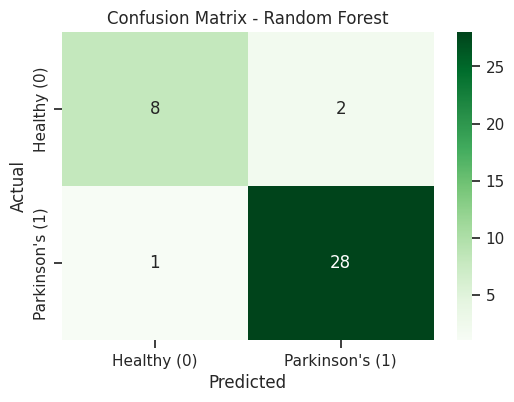

/tmp/ipython-input-3528745837.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


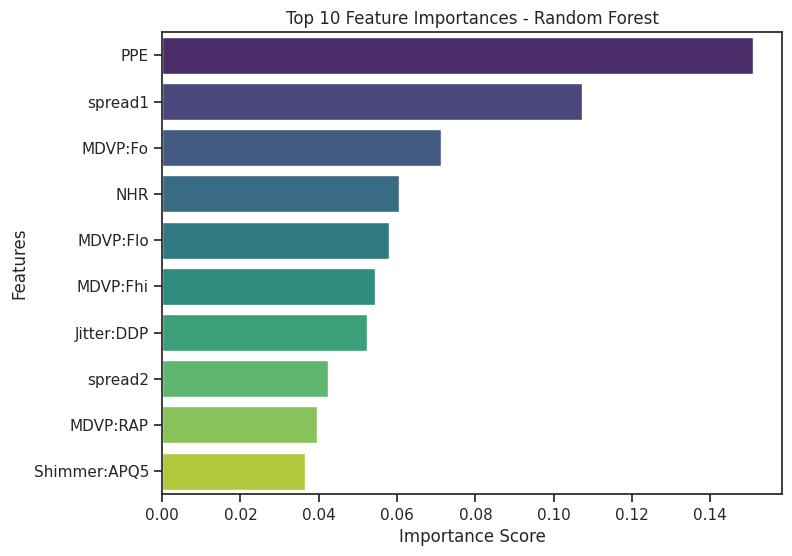

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the Parkinson's dataset
parkinsons = fetch_ucirepo(id=174)

# Extract features (X) and target (y)
X = parkinsons.data.features
y = parkinsons.data.targets

# Combine into one DataFrame
df = pd.concat([X, y], axis=1)

# 2. Define features and target
X_data = df.drop('status', axis=1)
y_data = df['status']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# 4. Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Predictions
y_pred = rf.predict(X_test)

# 6. Evaluation
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Healthy (0)', 'Parkinson\'s (1)'],
            yticklabels=['Healthy (0)', 'Parkinson\'s (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 8. Feature Importance Plot
importances = pd.Series(rf.feature_importances_, index=X_data.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


**Question 6**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

Increasing n-estimators improves performance up to a point by reducing variance.
After a threshold, gains become negligible while computation cost increases.

In [ ]:
!pip3 install -U ucimlrepo


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

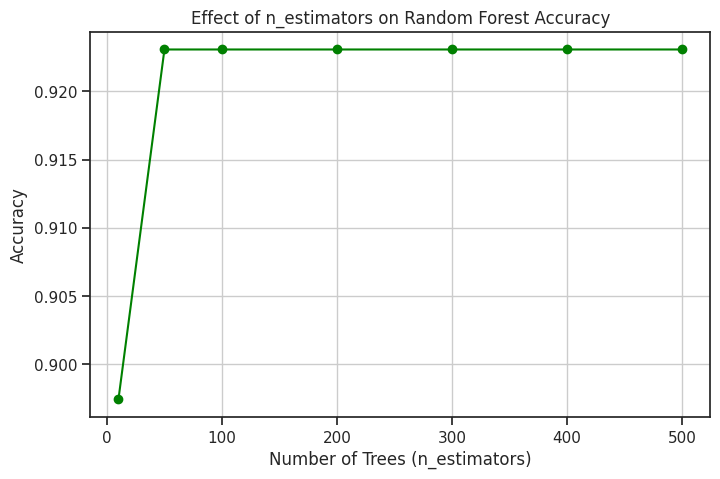

n_estimators=10: Accuracy=0.8974
n_estimators=50: Accuracy=0.9231
n_estimators=100: Accuracy=0.9231
n_estimators=200: Accuracy=0.9231
n_estimators=300: Accuracy=0.9231
n_estimators=400: Accuracy=0.9231
n_estimators=500: Accuracy=0.9231


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load Parkinson's dataset
parkinsons = fetch_ucirepo(id=174)
X = parkinsons.data.features
y = parkinsons.data.targets

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Test different values of n_estimators
n_estimators_list = [10, 50, 100, 200, 300, 400, 500]
accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 4. Plot results
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-', color='green')
plt.title("Effect of n_estimators on Random Forest Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Print results
for n, acc in zip(n_estimators_list, accuracies):
    print(f"n_estimators={n}: Accuracy={acc:.4f}")


**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

Random Forest performs better than logistic regression on the Parkinson's dataset because random forest can model complex, nonlinear patterns and feature interactions, which are important for distinguishing between healthy and Parkinson's patients.

**Question 8**.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

With a large dataset and noisy features, Random Forest would generally generalize better because it can learn complex, nonlinear boundaries.

**Question 10.**

Learn utilising synthetic data in AI using https://www.syngendata.ai to explore the above mentioned data visualisation